In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dfx=pd.read_csv('train_X_p1.csv')
dfx.head()

,Student ID,University ranking,Student's University dropout rate,SOP rating,CGPA,ZIP Code,GRE,Employed,Strong LOR,Have non academic activities,Been abroad
0,3746.0,30.0,7.73,1.0,7.31,90640.0,317.0,0.0,0.0,0.0,1.0
1,848.0,49.0,16.59,3.0,6.35,94539.0,297.0,0.0,0.0,0.0,1.0
2,2556.0,80.0,28.86,2.0,7.12,94143.0,298.0,0.0,0.0,0.0,0.0
3,3641.0,84.0,32.95,3.0,5.94,95821.0,298.0,1.0,0.0,0.0,0.0
4,4007.0,80.0,27.50,3.0,5.42,92130.0,296.0,0.0,0.0,0.0,1.0


In [6]:
dfy=pd.read_csv('train_Y_p1.csv')
dfy.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [7]:
dfx.shape,dfy.shape

((4000, 11), (4000, 1))

In [8]:
dfx.drop(['Student ID','ZIP Code'],axis='columns',inplace=True)
dfx.head()

,University ranking,Student's University dropout rate,SOP rating,CGPA,GRE,Employed,Strong LOR,Have non academic activities,Been abroad
0,30.0,7.73,1.0,7.31,317.0,0.0,0.0,0.0,1.0
1,49.0,16.59,3.0,6.35,297.0,0.0,0.0,0.0,1.0
2,80.0,28.86,2.0,7.12,298.0,0.0,0.0,0.0,0.0
3,84.0,32.95,3.0,5.94,298.0,1.0,0.0,0.0,0.0
4,80.0,27.50,3.0,5.42,296.0,0.0,0.0,0.0,1.0


In [23]:
columns=['University ranking','Student\'s University dropout rate','SOP rating','CGPA','GRE']

In [24]:
from sklearn import preprocessing
minmaxscaler=preprocessing.MinMaxScaler()
dfx[columns]=minmaxscaler.fit_transform(dfx[columns])

In [25]:
dfx.head()

,University ranking,Student's University dropout rate,SOP rating,CGPA,GRE,Employed,Strong LOR,Have non academic activities,Been abroad
0,0.1250,0.091000,0.0,0.513333,0.54,0.0,0.0,0.0,1.0
1,0.3625,0.386333,1.0,0.300000,0.14,0.0,0.0,0.0,1.0
2,0.7500,0.795333,0.5,0.471111,0.16,0.0,0.0,0.0,0.0
3,0.8000,0.931667,1.0,0.208889,0.16,1.0,0.0,0.0,0.0
4,0.7500,0.750000,1.0,0.093333,0.12,0.0,0.0,0.0,1.0


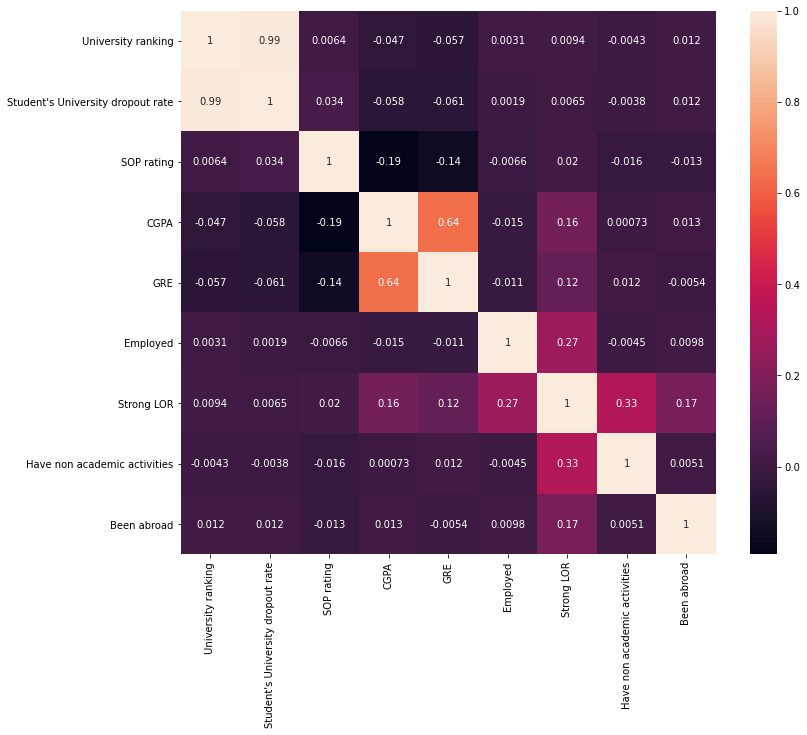

In [29]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(dfx.corr(),annot=True)

(array([630., 909., 722., 680., 303., 262., 216., 165., 106.,   7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

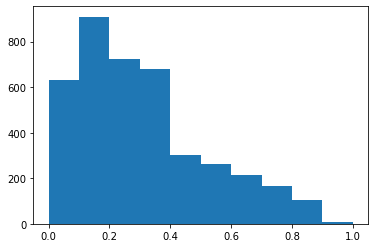

In [30]:
plt.hist(dfx['CGPA'])

In [31]:
dfx.shape

(4000, 9)

In [34]:
model=keras.Sequential([
    keras.layers.Dense(9,input_shape=(9,),activation='relu'),
    keras.layers.Dense(9,activation='relu'),
    keras.layers.Dense(9,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(dfx,dfy,epochs=100,batch_size=64,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 0s 8ms/step - loss: 0.5648 - accuracy: 0.8572 - val_loss: 0.4343 - val_accuracy: 0.9137
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.9016 - val_loss: 0.2984 - val_accuracy: 0.9137
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.9016 - val_loss: 0.2722 - val_accuracy: 0.9137
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.9016 - val_loss: 0.2591 - val_accuracy: 0.9137
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.9016 - val_loss: 0.2483 - val_accuracy: 0.9137
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.9016 - val_loss: 0.2341 - val_accuracy: 0.9137
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.9016 - val_loss: 0.2208 - val_accuracy: 0.9137
Epoch 8/100
5

50/50 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9741 - val_loss: 0.0794 - val_accuracy: 0.9750
Epoch 59/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0759 - accuracy: 0.9750 - val_loss: 0.0794 - val_accuracy: 0.9787
Epoch 60/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9734 - val_loss: 0.0793 - val_accuracy: 0.9775
Epoch 61/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9741 - val_loss: 0.0794 - val_accuracy: 0.9800
Epoch 62/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9744 - val_loss: 0.0785 - val_accuracy: 0.9762
Epoch 63/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9725 - val_loss: 0.0793 - val_accuracy: 0.9787
Epoch 64/100
50/50 [==============================] - ETA: 0s - loss: 0.0778 - accuracy: 0.97 - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9744 - val_loss: 0.0811 

In [35]:
model.evaluate(dfx,dfy)

125/125 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9765


[0.07234035432338715, 0.9764999747276306]